# Inference with faster-RCNN
This notebook demonstrates a standardized pipeline for utilizing pre-trained models (faster-RCNN) and their associated weights from the Torch Hub.

## Resources
- [Torch Vision Model](https://pytorch.org/vision/stable/models.html) : List of available models and weights, pretrain and 
- [Torch Official Tutorial](https://pytorch.org/hub/pytorch_vision_resnet/) : Tutorial on basic pytorch.
- [Torch Official SSD](https://pytorch.org/vision/main/models/ssd.html)
- [Nvidia Hub implementation](https://pytorch.org/hub/nvidia_deeplearningexamples_ssd/)

# Data

In [1]:
import urllib
# Download an example image from the pytorch website
url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)

# Summary 
## One Cell scripts for inference on model and inference
Individuals who possess the ability to comprehend and follow the scripts presented in the subsequent cell may forgo the explanatory sections, as these sections provide a more detailed analysis of the aforementioned cells.

dog 0.9965646862983704


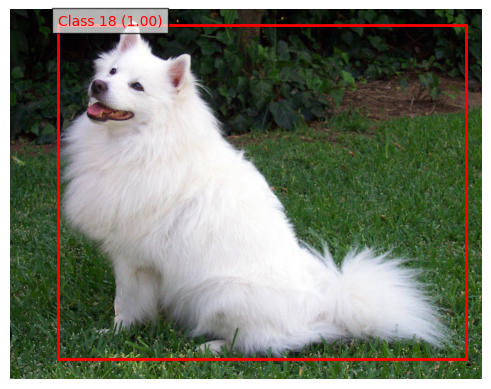

id_2_label[labels.item()] ='dog'


In [2]:
from torchvision.io.image import read_image
from PIL import Image
from torchvision.models.detection import fasterrcnn_resnet50_fpn_v2, FasterRCNN_ResNet50_FPN_V2_Weights
from torchvision.utils import draw_bounding_boxes
from torchvision.transforms.functional import to_pil_image
import matplotlib.pyplot as plt
import torch

# Step 1: Initialize model with the best available weights
weights = FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT
model = fasterrcnn_resnet50_fpn_v2(weights=weights, box_score_thresh=0.9)
model.eval()

# Step 2: Load data
# Download an example image from the pytorch website
url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)
image = Image.open(filename)

# Step 3: Apply preprocessing transforms
preprocess = weights.transforms()
batch = [preprocess(image)]

# Step 4: Use the model and visualize the prediction
with torch.no_grad():
    prediction = model(batch)[0]

id_2_label = {idx:x for idx,x in enumerate(weights.meta["categories"])}

# Extract bounding boxes, labels, and scores
boxes = prediction['boxes']
labels = prediction['labels']
scores = prediction['scores']

# Visualize the results
plt.imshow(image)
for box, label, score in zip(boxes, labels, scores):
  if score > 0.1:
    print(id_2_label[label.item()], score.item())
    plt.gca().add_patch(plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1],
                                      fill=False, edgecolor='red', linewidth=2))
    plt.text(box[0], box[1], f"Class {label.item()} ({score:.2f})", color='red', fontsize=10,
             bbox=dict(facecolor='white', alpha=0.7))

plt.axis('off')
plt.show()
print(f"{id_2_label[labels.item()] =}")

# Breakdown

The PyTorch vision library offers a selected of pre-trained R-CNN object detection models, as documented in the official PyTorch documentation: https://pytorch.org/vision/stable/models.html. (Please refer to the object detection section)

## 1. Model Loading - faster R-CNN family
The loaded model leverages a pre-trained faster R-CNN architecture built upon a Resnet50 convolutional neural network (CNN). This model falls under the category of two-stage object detectors, with the following components:

- CNN backbone (resnet50)
- Region Proposal Network (RPN)
- Fully-connected layers for outputting bounding box and class label


In [3]:
from torchinfo import summary
# Step 1: Initialize model with the best available weights
weights = FasterRCNN_ResNet50_FPN_V2_Weights.DEFAULT
model = fasterrcnn_resnet50_fpn_v2(weights=weights, box_score_thresh=0.9)
model.eval()
summary(model)

Layer (type:depth-idx)                             Param #
FasterRCNN                                         --
├─GeneralizedRCNNTransform: 1-1                    --
├─BackboneWithFPN: 1-2                             --
│    └─IntermediateLayerGetter: 2-1                --
│    │    └─Conv2d: 3-1                            (9,408)
│    │    └─BatchNorm2d: 3-2                       (128)
│    │    └─ReLU: 3-3                              --
│    │    └─MaxPool2d: 3-4                         --
│    │    └─Sequential: 3-5                        (215,808)
│    │    └─Sequential: 3-6                        1,219,584
│    │    └─Sequential: 3-7                        7,098,368
│    │    └─Sequential: 3-8                        14,964,736
│    └─FeaturePyramidNetwork: 2-2                  --
│    │    └─ModuleList: 3-9                        985,088
│    │    └─ModuleList: 3-10                       2,361,344
│    │    └─LastLevelMaxPool: 3-11                 --
├─RegionProposalNetwork: 1-3

## 2. Data Loading

In [4]:
# Download an example image from the pytorch website
url, filename = ("https://github.com/pytorch/hub/raw/master/images/dog.jpg", "dog.jpg")
try: urllib.URLopener().retrieve(url, filename)
except: urllib.request.urlretrieve(url, filename)
image = Image.open(filename)


## 3. Preprocess the image
Define a transformation pipeline (adjust based on model requirements). 
- using preprocess defined from the weights here

In [5]:
# Step 3: Apply preprocessing transforms
preprocess = weights.transforms()
batch = [preprocess(image)]

## 4: Model Inference

In [6]:
# Step 4: Use the model and visualize the prediction
with torch.no_grad():
    prediction = model(batch)

## 5: Visualize the 1st prediction

dog 0.9965646862983704


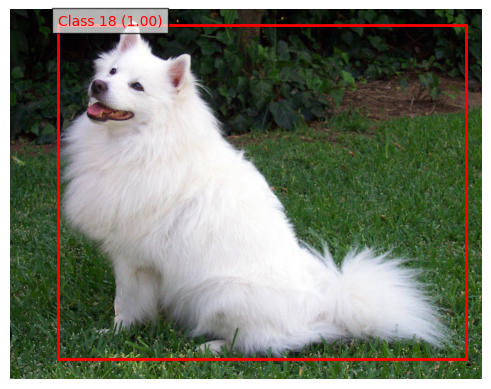

id_2_label[labels.item()] ='dog'


In [7]:
import matplotlib.pyplot as plt
# Extract bounding boxes, labels, and scores
boxes = prediction[0]['boxes']
labels = prediction[0]['labels']
scores = prediction[0]['scores']

# Visualize the results
plt.imshow(image)
for box, label, score in zip(boxes, labels, scores):
  if score > 0.1:
    print(id_2_label[label.item()], score.item())
    plt.gca().add_patch(plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1],
                                      fill=False, edgecolor='red', linewidth=2))
    plt.text(box[0], box[1], f"Class {label.item()} ({score:.2f})", color='red', fontsize=10,
             bbox=dict(facecolor='white', alpha=0.7))

plt.axis('off')
plt.show()
print(f"{id_2_label[labels.item()] =}")